In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('/content/Task 3 and 4_Loan_Data.csv')
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [25]:
df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


### Inferences
- No null values
- customer_id is not relevant to the model
- credit lines outstanding and target i.e Default are
catergorical variable.
- total debt oustanding is right skewed.

## Distribution of Target variable

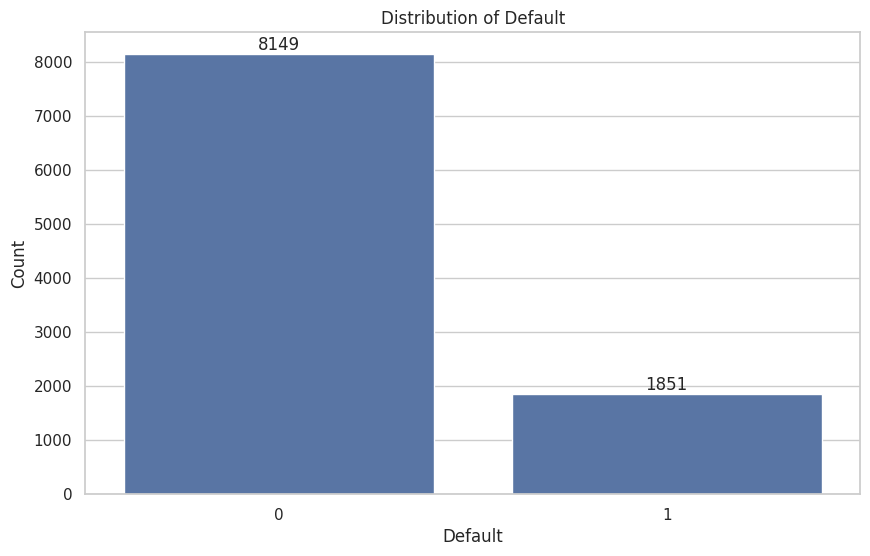

In [26]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='default', data=df)

for containers in ax.containers:
    ax.bar_label(containers)

plt.title('Distribution of Default')
plt.xlabel('Default')
plt.ylabel('Count')
plt.show()

### Inferences
- We clearly have an imbalance in defaulters count. Hence we need to account for this imbalance in the model.

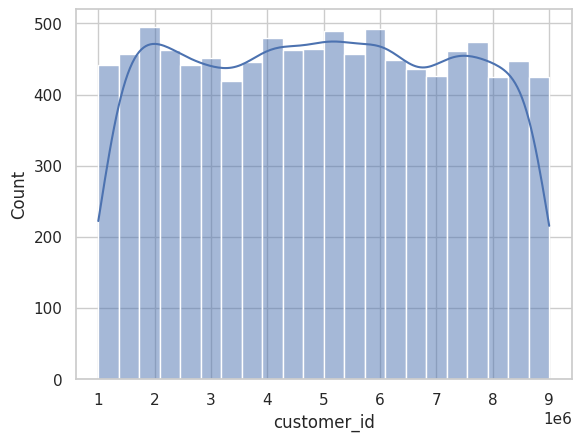

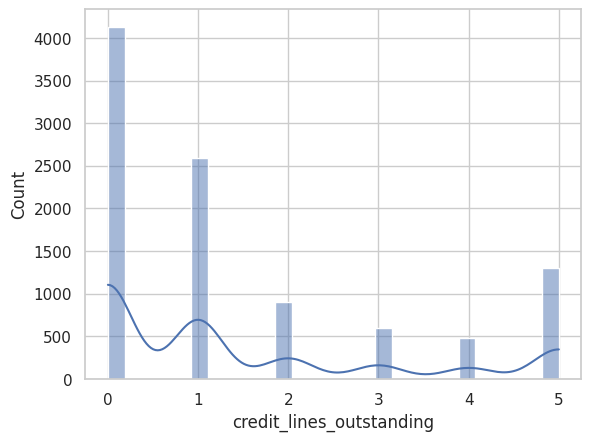

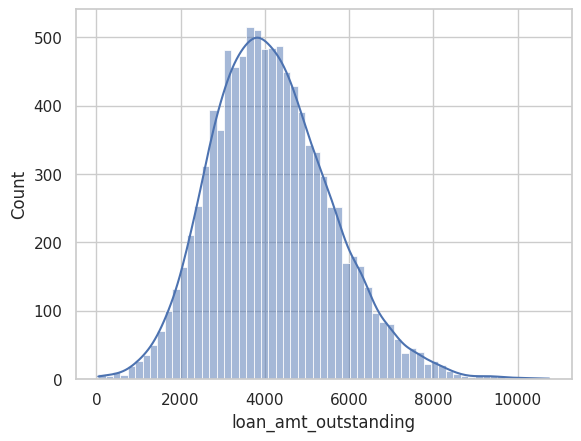

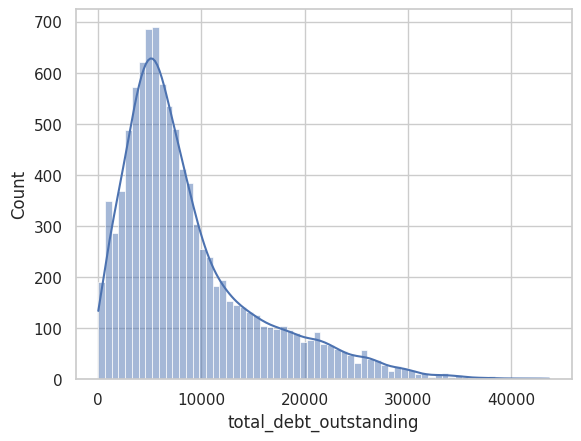

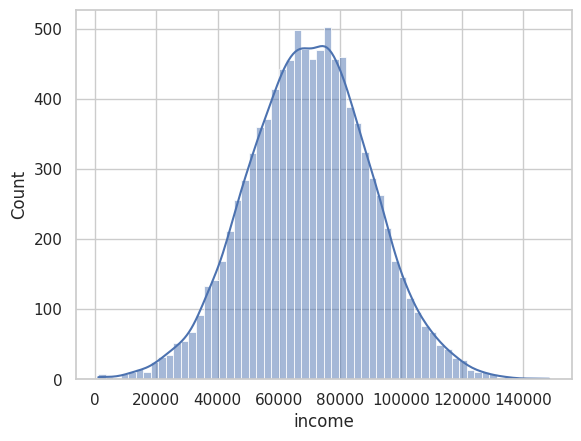

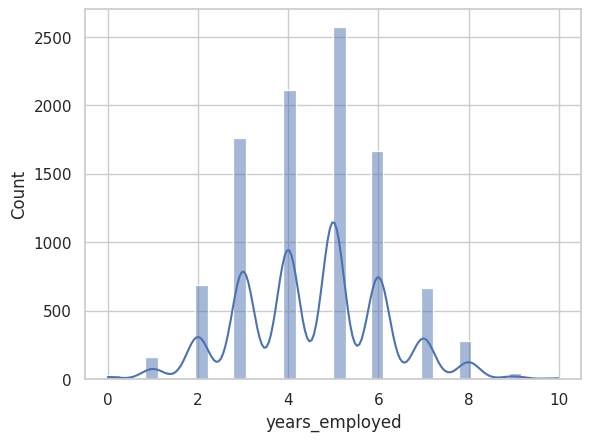

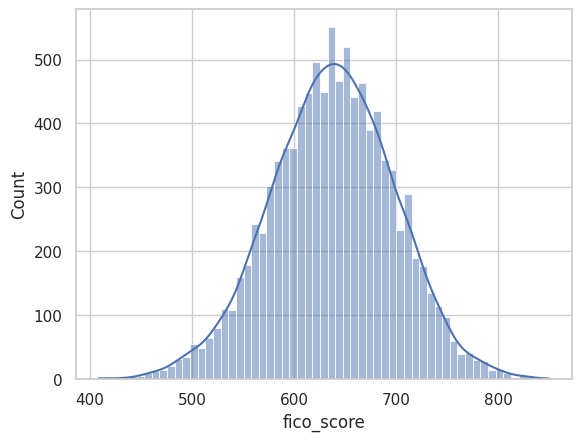

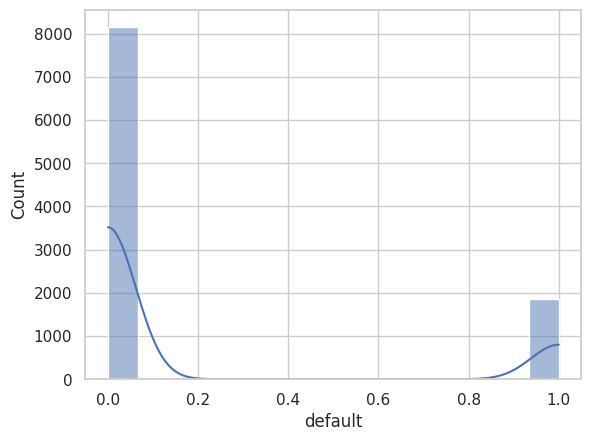

In [27]:
for col in df.columns :
  sns.histplot(df[col],kde=True)
  plt.show()

### Outlier Analysis

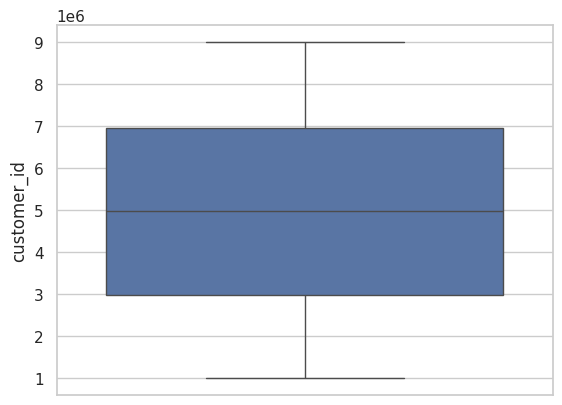

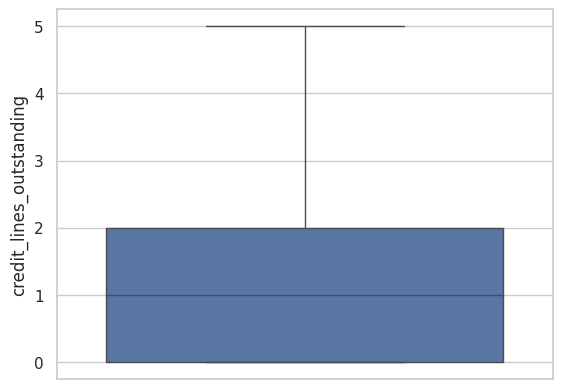

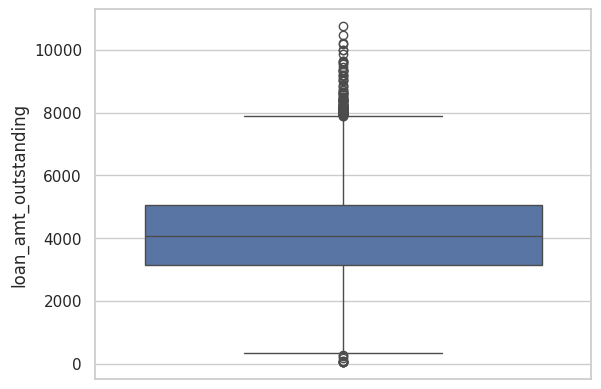

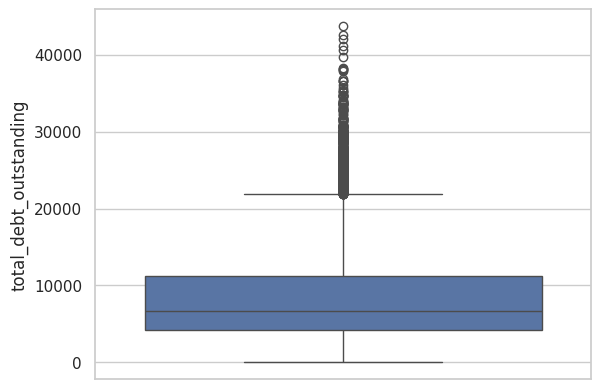

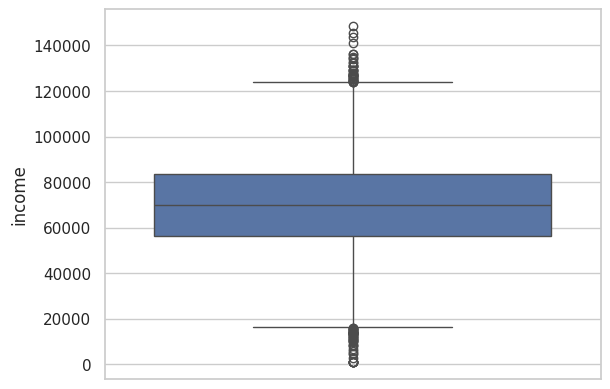

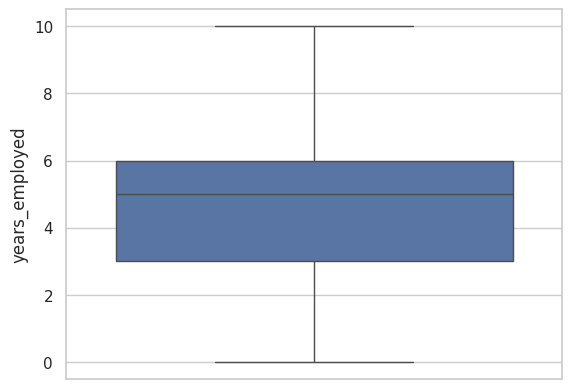

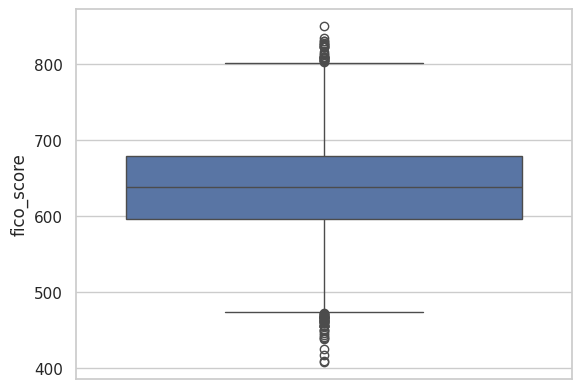

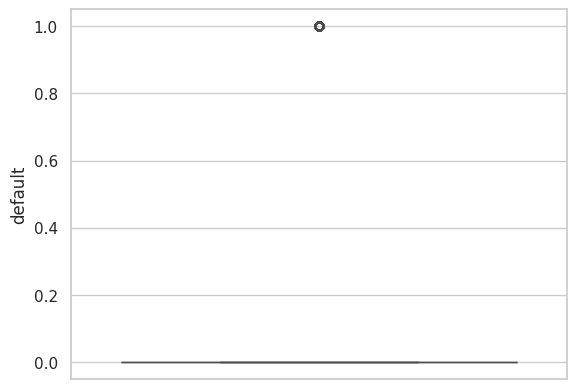

In [28]:
for col in df.columns :
  sns.boxplot(df[col])
  plt.show()

### Inferences
- We can see outliers in FICO score, income and total_debt_outstanding.
- But these like FICO and total_debt are meaningful and have meaningful info.

In [29]:
df = df.drop('customer_id', axis=1)

## Model

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [31]:
X = df.drop('default', axis=1)
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

### Desicion Tree

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   credit_lines_outstanding  10000 non-null  int64  
 1   loan_amt_outstanding      10000 non-null  float64
 2   total_debt_outstanding    10000 non-null  float64
 3   income                    10000 non-null  float64
 4   years_employed            10000 non-null  int64  
 5   fico_score                10000 non-null  int64  
 6   default                   10000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 547.0 KB


In [33]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')  # Handles imbalance
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       0.99      0.98      0.99       370

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [34]:
print("Tree depth:", dt.get_depth())
print("Number of leaves:", dt.get_n_leaves())

Tree depth: 12
Number of leaves: 60


In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X, y, cv=5, scoring='f1')
print("CV F1 scores:", scores)
print("Mean CV F1:", scores.mean())

CV F1 scores: [0.98924731 0.98921833 0.98778833 0.98913043 0.98387097]
Mean CV F1: 0.9878510748530769


- The low deviation in CV scores suggests that the model is not overfitting.

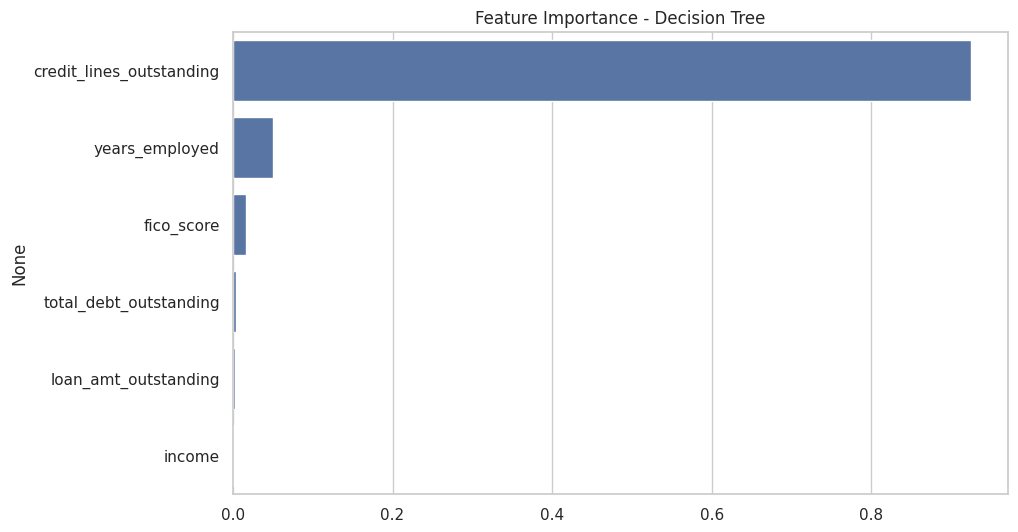

In [44]:
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)

# Sort and plot
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importances.values, y=feat_importances.index)
plt.title("Feature Importance - Decision Tree")
plt.show()

- **A person with more oprn credit cards has may mean higher total credit exposure, increasing risk if the borrower is overextended.**

### Lets try Random Forest

In [37]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # handle imbalance
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [38]:
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_proba_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       0.99      0.98      0.99       370

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Random Forest ROC AUC: 0.9998574034156857


- results similar to DT

### XgBoost Classifier

In [39]:
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)  # imbalance ratio

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    n_estimators=100
)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [40]:
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("XGBoost ROC AUC:", roc_auc_score(y_test, y_proba_xgb))

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1630
           1       0.99      0.99      0.99       370

    accuracy                           1.00      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000

XGBoost ROC AUC: 0.999902172110761


- We can see that all the models give a similar score indicating that the data is well separated and imbalance is handled.

## Function to Predict

In [41]:
def estimate_expected_loss(input_data, model, recovery_rate=0.1):


    if isinstance(input_data, dict):
        input_df = pd.DataFrame([input_data])
    else:
        input_df = input_data.copy()

    # Extract total_debt_outstanding separately
    total_debt = input_df['total_debt_outstanding'].values[0]
    input_df = input_df.drop('customer_id', axis=1)

    # Predict default probability (probability of class 1)
    prob_default = model.predict_proba(input_df)[:, 1][0]

    # Calculate expected loss
    expected_loss = prob_default * (1 - recovery_rate) * total_debt

    return expected_loss, prob_default


In [45]:
user_input = {}
customer_id = input("Enter customer ID: ")
user_input['customer_id'] = customer_id

credit_lines_outstanding = int(input("Enter credit lines outstanding: "))
user_input['credit_lines_outstanding'] = credit_lines_outstanding

loan_amt_outstanding = float(input("Enter loan amount outstanding: "))
user_input['loan_amt_outstanding'] = loan_amt_outstanding

total_debt_outstanding = float(input("Enter total debt outstanding: "))
user_input['total_debt_outstanding'] = total_debt_outstanding

income = float(input("Enter income: "))
user_input['income'] = income

years_employed = float(input("Enter years employed: "))
user_input['years_employed'] = years_employed

fico_score = int(input("Enter FICO score: "))
user_input['fico_score'] = fico_score

loss, prob = estimate_expected_loss(user_input, xgb)
print(f"Expected Loss: ${loss:.2f}")
print(f"Probability of Default: {prob:.4f}")

Enter customer ID: 1234567
Enter credit lines outstanding: 1
Enter loan amount outstanding: 3000
Enter total debt outstanding: 2000
Enter income: 1000
Enter years employed: 3
Enter FICO score: 640
Expected Loss: $0.91
Probability of Default: 0.0005
